## 作業:
課程範例以 訓練資料集來檢視，先看一下測試資料特性，再把測試資料集和訓練資料集合併，並回答下列問題，   
目的:讓大家熟悉對應這樣的問題，我們要提取怎樣的函數來進行計算。   

* Q1: 觀察測試(test)資料集和訓練(Train)資料集的變數的差異性?
* Q2: 測試資料集是否有遺失值?
* Q3: 從合併資料選取一個變數，嘗試去做各種不同遺失值的處理，並透過圖形或數值來做輔助判斷，補值前與後的差異，你覺得以這個變數而言，試著說明每一個方法的差異。   


In [38]:
#把需要的 library import 進來
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
#讓圖可以在 jupyter notebook顯示
%matplotlib inline

In [6]:
#顯示圖形的函數，可不先不用理解，直接用
from IPython.display import display
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [14]:
# 把兩個訓練資料集和測試資料集讀進來
df_test = pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")

## Q1: 判斷 測試資料集和訓練資料集欄位變數是否有差異性?

In [26]:
# Q1: 判斷 測試資料集和訓練資料集欄位變數是否有差異性?
# 印出前五筆資料判斷
display(df_test.head(5)) 
display(df_train.head(5))

print("有差異，train資料有 Survived 欄位")


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


有差異，train資料有 Survived 欄位


## A1 : Test 資料集沒有 'Survived'

## Q2: 測試資料集是否有遺失值?

In [32]:
# 當有些資料用 "null" 代表空值時，需要先做轉換，
df_test= df_test.replace('null',np.NaN)

#判斷每一個資料點，是否為空值:
print(df_test.isnull().head(5))
print("------")

# 會判断哪些”列”存在缺失值
# any：判斷一個tuple或者list是否全為空
print(df_test.isnull().any())
print("------")

# 統計 data 裡有空值的變數個數
print(df_test.isnull().any().sum())
print("------")

print("有, Age, Fare 和 Cabin 有遺失值")

   PassengerId  Pclass   Name    Sex    Age  SibSp  Parch  Ticket   Fare  \
0        False   False  False  False  False  False  False   False  False   
1        False   False  False  False  False  False  False   False  False   
2        False   False  False  False  False  False  False   False  False   
3        False   False  False  False  False  False  False   False  False   
4        False   False  False  False  False  False  False   False  False   

   Cabin  Embarked  
0   True     False  
1   True     False  
2   True     False  
3   True     False  
4   True     False  
------
PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool
------
3
------
有, Age, Fare 和 Cabin 有遺失值


## Q3: 從合併資料選取一個變數，嘗試去做各種不同遺失值的處理，並透過圖形來做輔助判斷，補值前與後的差異，你覺得以這個變數而言，試著說明每一個方法的差異。   

In [162]:
#合併資料
df = pd.concat([df_train,df_test])
df.info()
# 先顯示前10行 觀查合併後的資料
display(df.head(5))

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [164]:
# 以 XXX 為例，先看 Cabin  出現值的特性
print(df['Cabin'].value_counts())


Cabin
C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C22 C26            4
F33                4
                  ..
A14                1
E63                1
E12                1
E38                1
C105               1
Name: count, Length: 186, dtype: int64


In [166]:
# 填充 NaN 值並提取首字母
df['Cabin'] = df['Cabin'].fillna('Unknown')
print(df['Cabin'].head(10))


0    Unknown
1        C85
2    Unknown
3       C123
4    Unknown
5    Unknown
6        E46
7    Unknown
8    Unknown
9    Unknown
Name: Cabin, dtype: object


In [168]:
# 提取首字母，如果是 'Unknown' 則保持不變
df['Cabin'] = df['Cabin'].apply(lambda x: str(x)[0] if x != 'Unknown' else 'Unknown')
# 檢查唯一值
print(df['Cabin'].unique())

['Unknown' 'C' 'E' 'G' 'D' 'A' 'B' 'F' 'T']


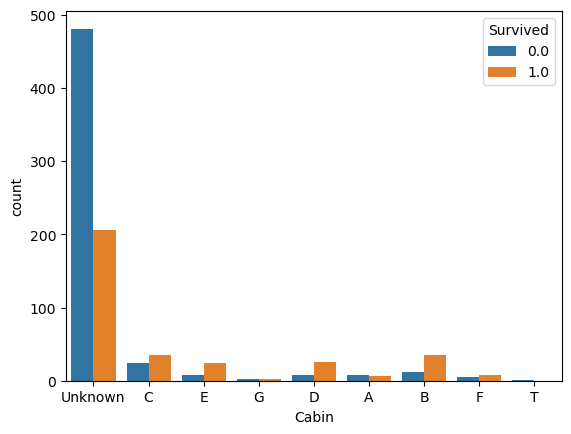

In [170]:
#調整後的 Cabin觀察遺失值的樣態
# 繪製圖表
sns.countplot(data=df, x='Cabin', hue='Survived')
plt.show()
# 結論：遺失 Cabin的死亡率較高

In [172]:
# 數值計算
df[['Cabin', 'Survived']].groupby(['Cabin'], as_index=False).mean().sort_values(by='Survived', ascending=True)
# Unknown的比例和 T 較接近

,Cabin,Survived
7,T,0.000000
8,Unknown,0.299854
0,A,0.466667
6,G,0.500000
2,C,0.593220
5,F,0.615385
1,B,0.744681
4,E,0.750000
3,D,0.757576


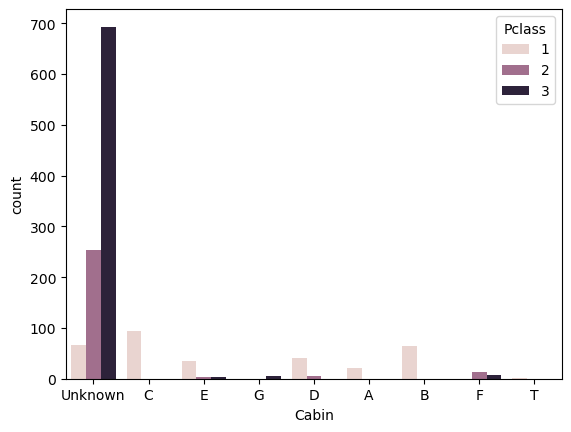

In [174]:
#方法2: 看Cabin和其他變數有無關係，可以進行補值
#查看Cabin 和 Pclass的相關性
sns.countplot(data=df, x='Cabin', hue='Pclass')
plt.show()
#結果顯示在3:lower的遺失值最多

In [ ]:
#方法3: 遺失比例太高，可以先不放入模型中